## I was also interested in analyzing if those Spanish regions with less income and higher unemployment rate were also the ones hardest hit by domestic violence

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
plt.rcParams['svg.fonttype'] = 'none' 

## I download the data from the National Institute of Statistics (INE, in Spanish)

In [2]:
df = pd.read_csv('average_net_annual_income.csv')

In [3]:
df.head()

,autonomous_community,year,average_net_annual_income
0,Andalucía,2020,11804
1,Andalucía,2019,10892
2,Andalucía,2018,10962
3,Andalucía,2017,10831
4,Andalucía,2016,9978


In [4]:
df_unemp = pd.read_csv('unemployment_gender_rate.csv')

In [5]:
df_unemp.gender.value_counts()

men      228
women    228
Name: gender, dtype: int64

In [6]:
# isolate only unemployment for women
df_women =df_unemp[df_unemp.gender=='women']
df_women.head()

,autonomous_community,gender,year,unemployment_rate
12,Andalucía,women,2021,26.7
13,Andalucía,women,2020,25.2
14,Andalucía,women,2019,25.4
15,Andalucía,women,2018,28.6
16,Andalucía,women,2017,30.3


In [7]:
df_women =df_women.drop(['gender'], axis=1)
df_women.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 12 to 455
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   autonomous_community  228 non-null    object 
 1   year                  228 non-null    int64  
 2   unemployment_rate     228 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 7.1+ KB


In [8]:
# merge both dataframes
df_merged = df.merge(df_women, how='inner',on=(['year', 'autonomous_community']))

In [9]:
df_merged.tail()

,autonomous_community,year,average_net_annual_income,unemployment_rate
193,Melilla,2014,13052,26.7
194,Melilla,2013,12564,29.4
195,Melilla,2012,12867,34.6
196,Melilla,2011,13346,23.5
197,Melilla,2010,12839,30.8


## Some exploratory analysis, unemployment among female population

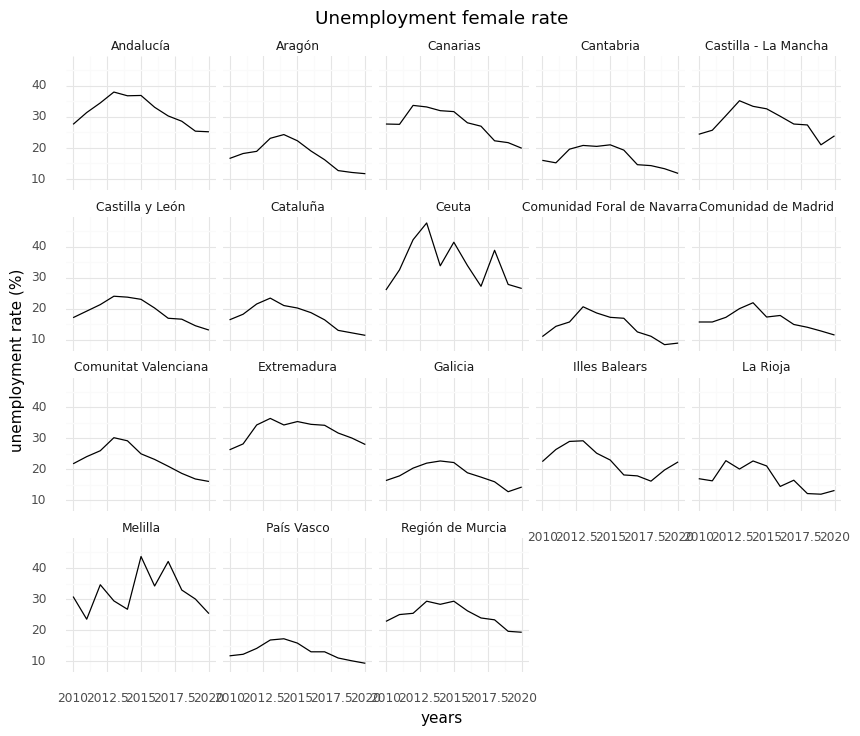

<ggplot: (301281127)>

In [10]:

from plotnine import *
display(
    ggplot(df_merged,             
        aes('year', 'unemployment_rate'))
        + geom_line() 
        + theme_minimal()
        + theme(figure_size=(10, 8))
        + facet_wrap('autonomous_community')
        + labs(
           title = "Unemployment female rate",
         y = "unemployment rate (%)",
          x = "years"
       )
) 

## A look into household average annual income

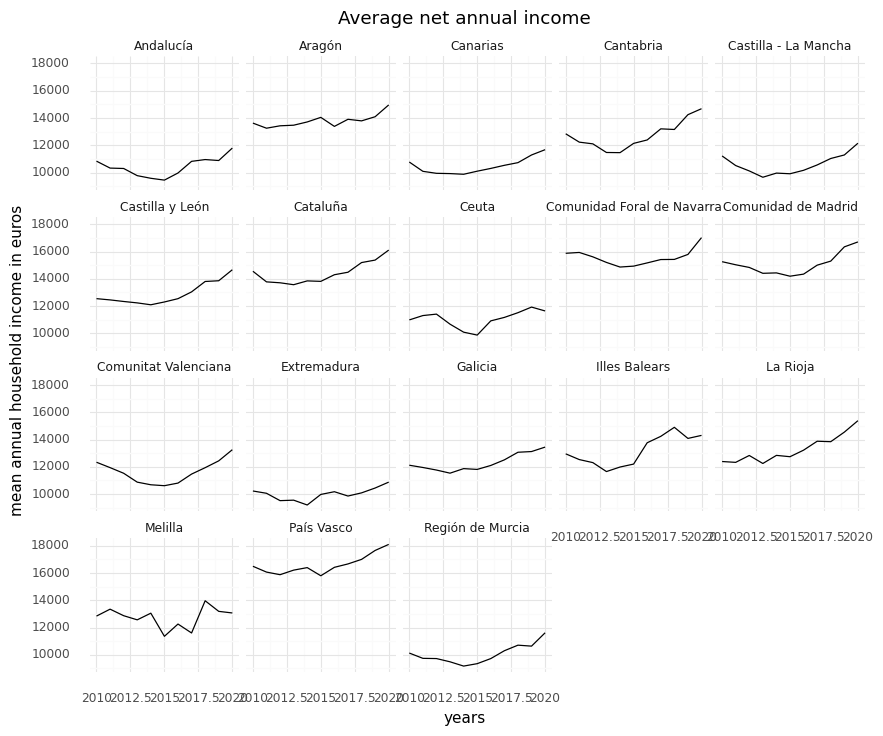

<ggplot: (301894131)>

In [11]:
from plotnine import *
display(
    ggplot(df_merged,             
        aes('year', 'average_net_annual_income'))
        + geom_line() 
        + theme_minimal()
        + theme(figure_size=(10, 8))
        + facet_wrap('autonomous_community')
 + labs(
  title = "Average net annual income",
   y = "mean annual household income in euros",
          x = "years"
     )
) 

## Finally I was curious to see how many of the women killed by an intimate partner or ex-partner had made a complaint to the police

In [12]:
df_complaints = pd.read_csv('pre_complaints.csv')
df_complaints.head()

,territory,no_complaint,yes_complaint
0,Andalucía,144,42
1,Aragón,16,6
2,Asturias,22,3
3,Balears Islands,23,7
4,Canary Islands,43,17


In [13]:
df_complaints = df_complaints[df_complaints.territory != 'Melilla']
df_complaints = df_complaints[df_complaints.territory != 'Ceuta']
df_complaints.head()

,territory,no_complaint,yes_complaint
0,Andalucía,144,42
1,Aragón,16,6
2,Asturias,22,3
3,Balears Islands,23,7
4,Canary Islands,43,17


In [14]:
df_complaints['total'] = df_complaints['no_complaint'] + df_complaints['yes_complaint']

In [15]:
df_complaints.head()

,territory,no_complaint,yes_complaint,total
0,Andalucía,144,42,186
1,Aragón,16,6,22
2,Asturias,22,3,25
3,Balears Islands,23,7,30
4,Canary Islands,43,17,60


In [16]:
# percentages of yes and no
df_complaints['pct_yes_complaint'] = (df_complaints['yes_complaint'] *100 / df_complaints['total']).round(2)
df_complaints['pct_no_complaint'] = (df_complaints['no_complaint'] *100 / df_complaints['total']).round(2)

In [17]:
df_complaints.head()

,territory,no_complaint,yes_complaint,total,pct_yes_complaint,pct_no_complaint
0,Andalucía,144,42,186,22.58,77.42
1,Aragón,16,6,22,27.27,72.73
2,Asturias,22,3,25,12.00,88.00
3,Balears Islands,23,7,30,23.33,76.67
4,Canary Islands,43,17,60,28.33,71.67


In [18]:
df_pct = df_complaints.drop(['total', 'no_complaint', 'yes_complaint'], axis = 1)
df_pct = df_pct.sort_values(by='pct_no_complaint', ascending = False)
df_pct.head(20)

,territory,pct_yes_complaint,pct_no_complaint
2,Asturias,12.00,88.00
11,Galicia,18.97,81.03
6,Castilla y León,20.00,80.00
0,Andalucía,22.58,77.42
3,Balears Islands,23.33,76.67
8,Cataluña,23.81,76.19
12,Madrid,24.27,75.73
13,Murcia,25.00,75.00
1,Aragón,27.27,72.73
4,Canary Islands,28.33,71.67


In [19]:
order = df_pct.territory.to_list()
order

['Asturias',
 'Galicia',
 'Castilla y León',
 'Andalucía',
 'Balears Islands',
 'Cataluña',
 'Madrid',
 'Murcia',
 'Aragón',
 'Canary Islands',
 'Vasque Country',
 'Castilla-La Mancha',
 'Navarra',
 'Region of Valencia',
 'La Rioja',
 'Cantabria',
 'Extremadura']

In [20]:
df_pct =df_pct.melt(
    id_vars='territory',
    value_name='pct',
    var_name='result')
df_pct

,territory,result,pct
0,Asturias,pct_yes_complaint,12.00
1,Galicia,pct_yes_complaint,18.97
2,Castilla y León,pct_yes_complaint,20.00
3,Andalucía,pct_yes_complaint,22.58
4,Balears Islands,pct_yes_complaint,23.33
5,Cataluña,pct_yes_complaint,23.81
6,Madrid,pct_yes_complaint,24.27
7,Murcia,pct_yes_complaint,25.00
8,Aragón,pct_yes_complaint,27.27
9,Canary Islands,pct_yes_complaint,28.33


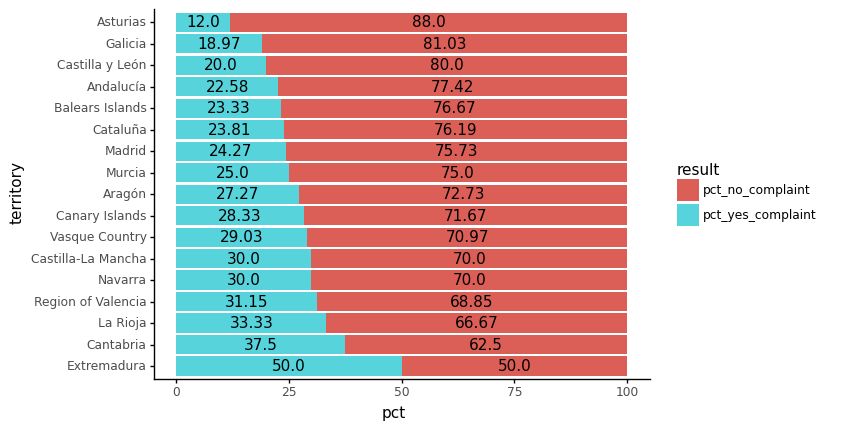

<ggplot: (302432205)>

In [21]:
chart_pct =(
    ggplot(df_pct)
    + aes(x='territory', y='pct', fill = 'result')
    + scale_x_discrete(limits=order[::-1])
    + geom_bar(stat='identity')
    + geom_text(aes(label='pct'),position = position_stack(vjust=0.5))
    + coord_flip()
    + theme_classic()
)
chart_pct

In [22]:
chart_pct.save('pct_complaints.svg')

/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/pmartisa/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: pct_complaints.svg


In [23]:
df_complaints.to_csv("pct_precomplaint.csv", index=False)

In [24]:
# according to the median, only 27% of the victims had complained in comparison to 72.7%
df_complaints.pct_yes_complaint.median()

27.27

In [25]:
df_complaints.pct_no_complaint.median()

72.73